> Chapter2 데이터 탐색과 데이터 정제
> > Section 01 단변량 데이터 탐색  
> > Section 02 이변량 데이터 검색  
> > Section 03 이상치 처리  
> > Section 04 변수 변환  
> > Section 05 결측치 처리  
> > Section 06 데이터정제 실전과제  

# Section1 단변량 데이터 탐색

In [1]:
import os
print(os.getcwd())
os.chdir('/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/자격증/빅분기/BigData_data_최종본(1022) (1)')
print(os.getcwd())

/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/자격증/빅분기
/Users/ryu/Desktop/데스크탑 - ryuseungho의 MacBook Air/2022/자격증/빅분기/BigData_data_최종본(1022) (1)


In [2]:
import pandas as pd
data = pd.read_csv('EX_CEOSalary.csv', encoding = 'utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [3]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


## 1.1 범주형 자료의 탐색

In [4]:
# data의 industry 값 확인
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [5]:
# 1,2,3,4를 Service
data['industry'] = data['industry'].replace([1,2,3,4],['Service','IT','Finance','Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

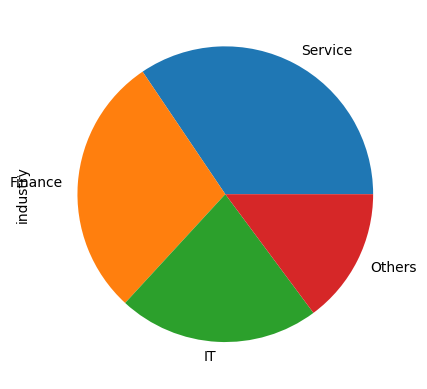

In [6]:
# inline 결과코드 안에
%matplotlib inline
data['industry'].value_counts().plot(kind = 'pie')

<AxesSubplot:>

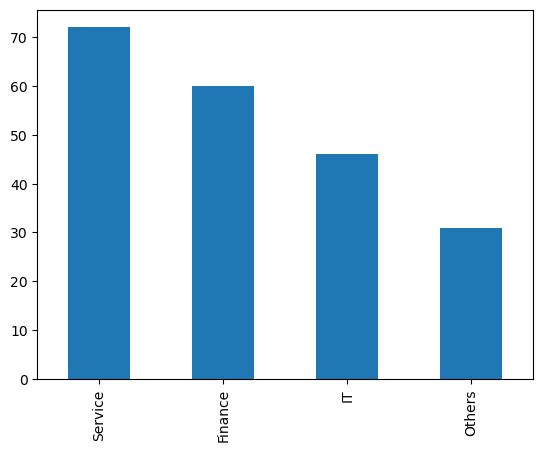

In [7]:
data['industry'].value_counts().plot(kind = 'bar')

In [8]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


## 1.2 연속형 자료의 탐색

In [9]:
# 데이터셋명.describe() : 모든 변수별 요약 통계량
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [10]:
# 왜도(skewness)
data.skew()

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/2851247318.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [11]:
# 첨도(jurtosis)
data.kurtosis()

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/1590414924.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

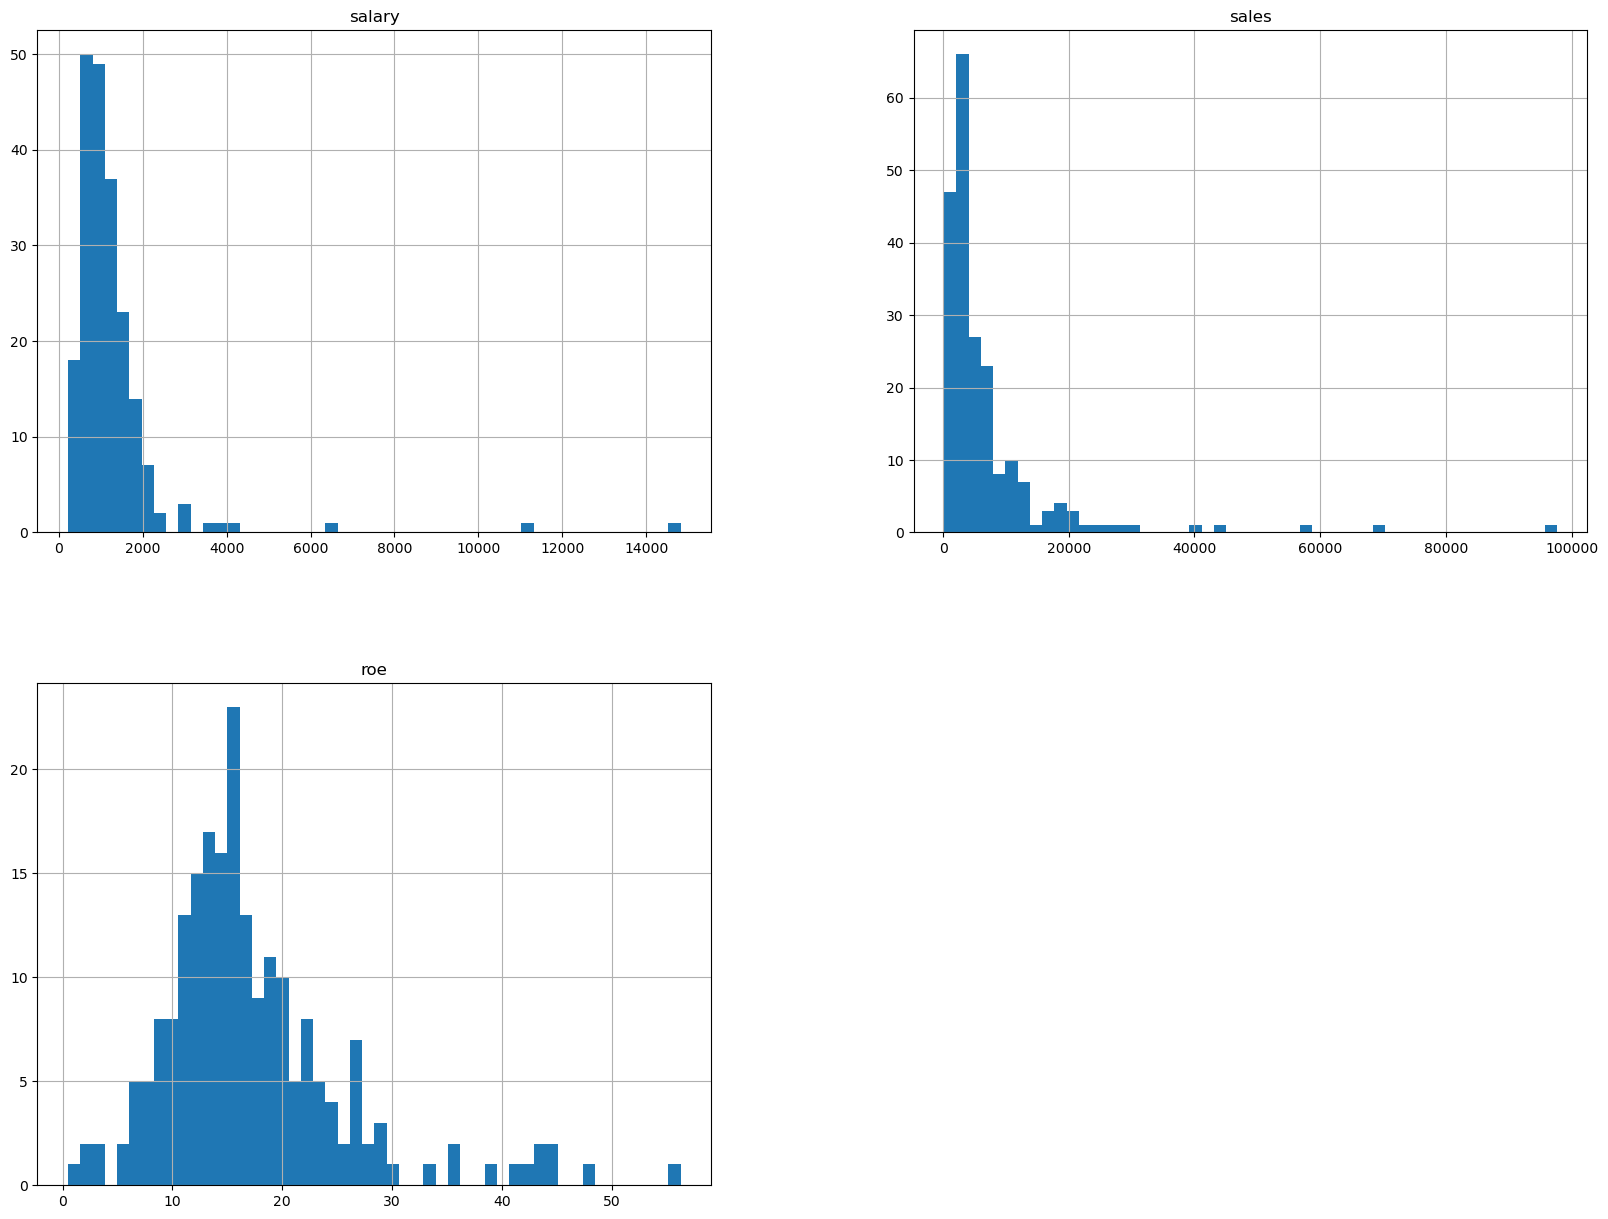

In [12]:
# bins : 구간너비, figsize : 도표 크기
import matplotlib.pyplot as plot
data.hist(bins = 50, figsize = (20, 15))

<AxesSubplot:>

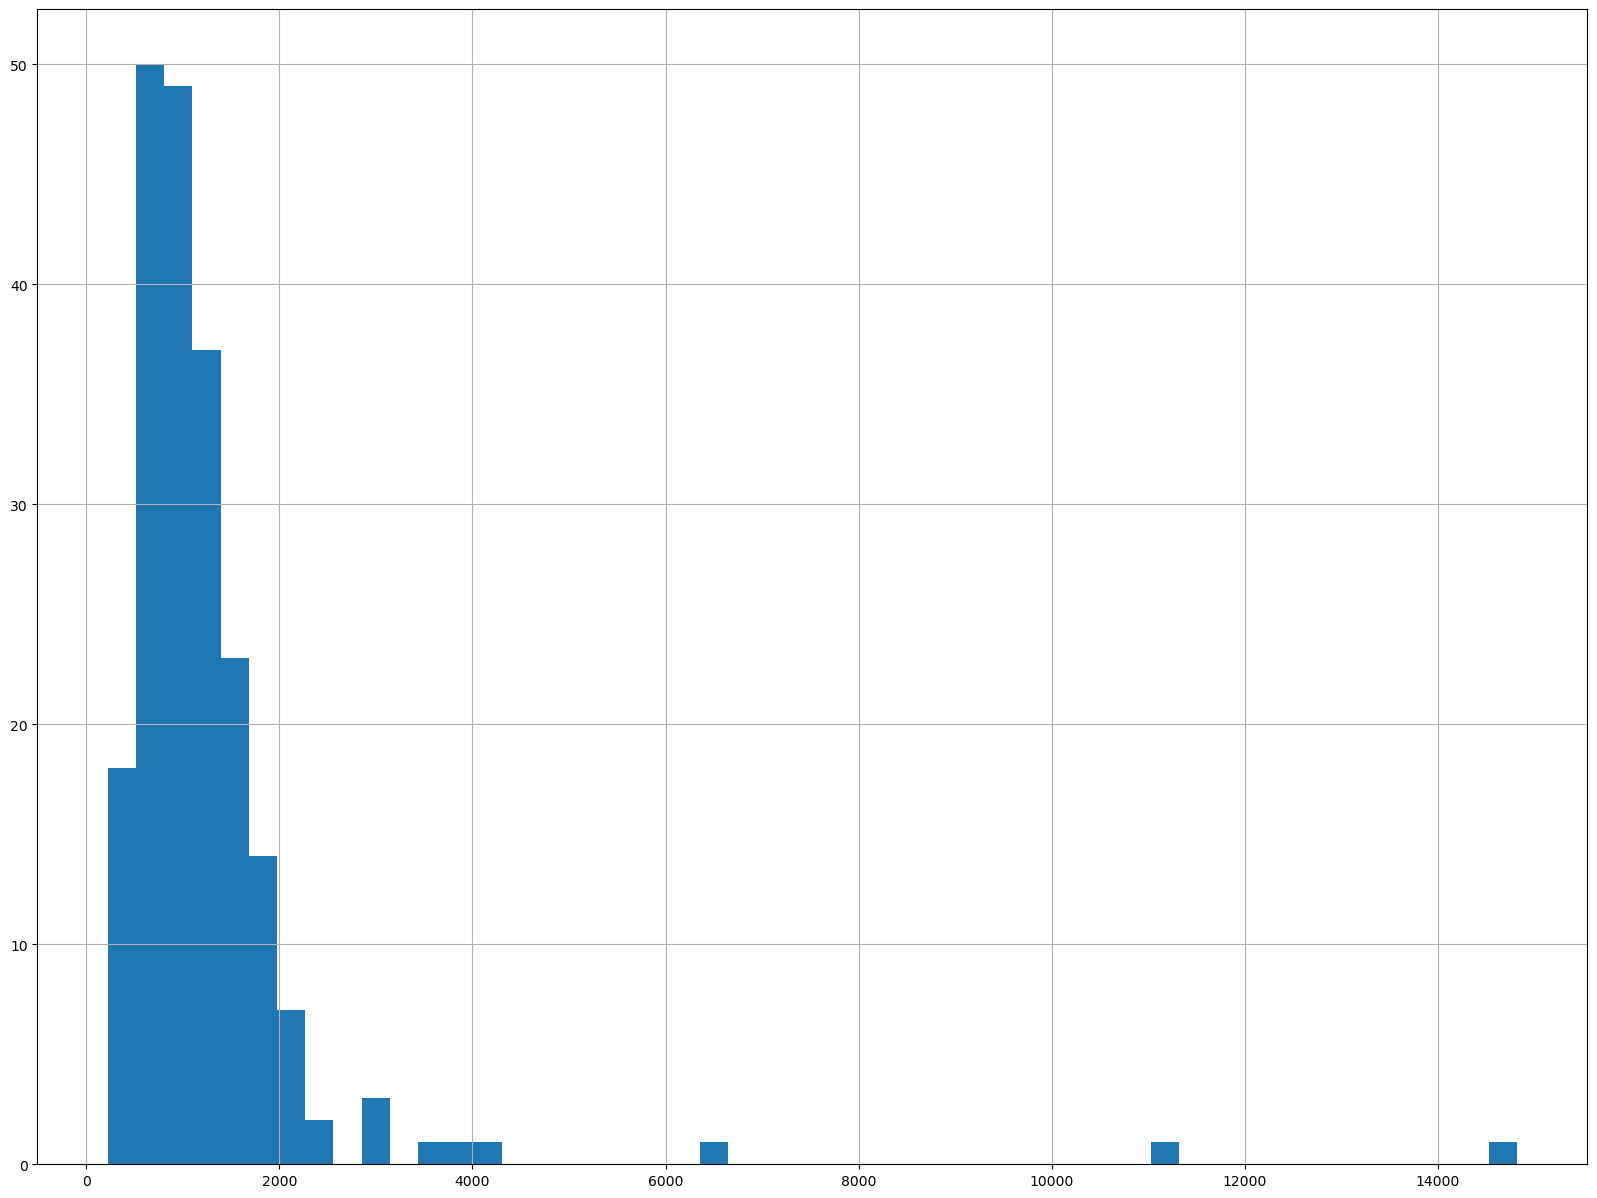

In [13]:
data['salary'].hist(bins = 50, figsize = (20,15))

<AxesSubplot:>

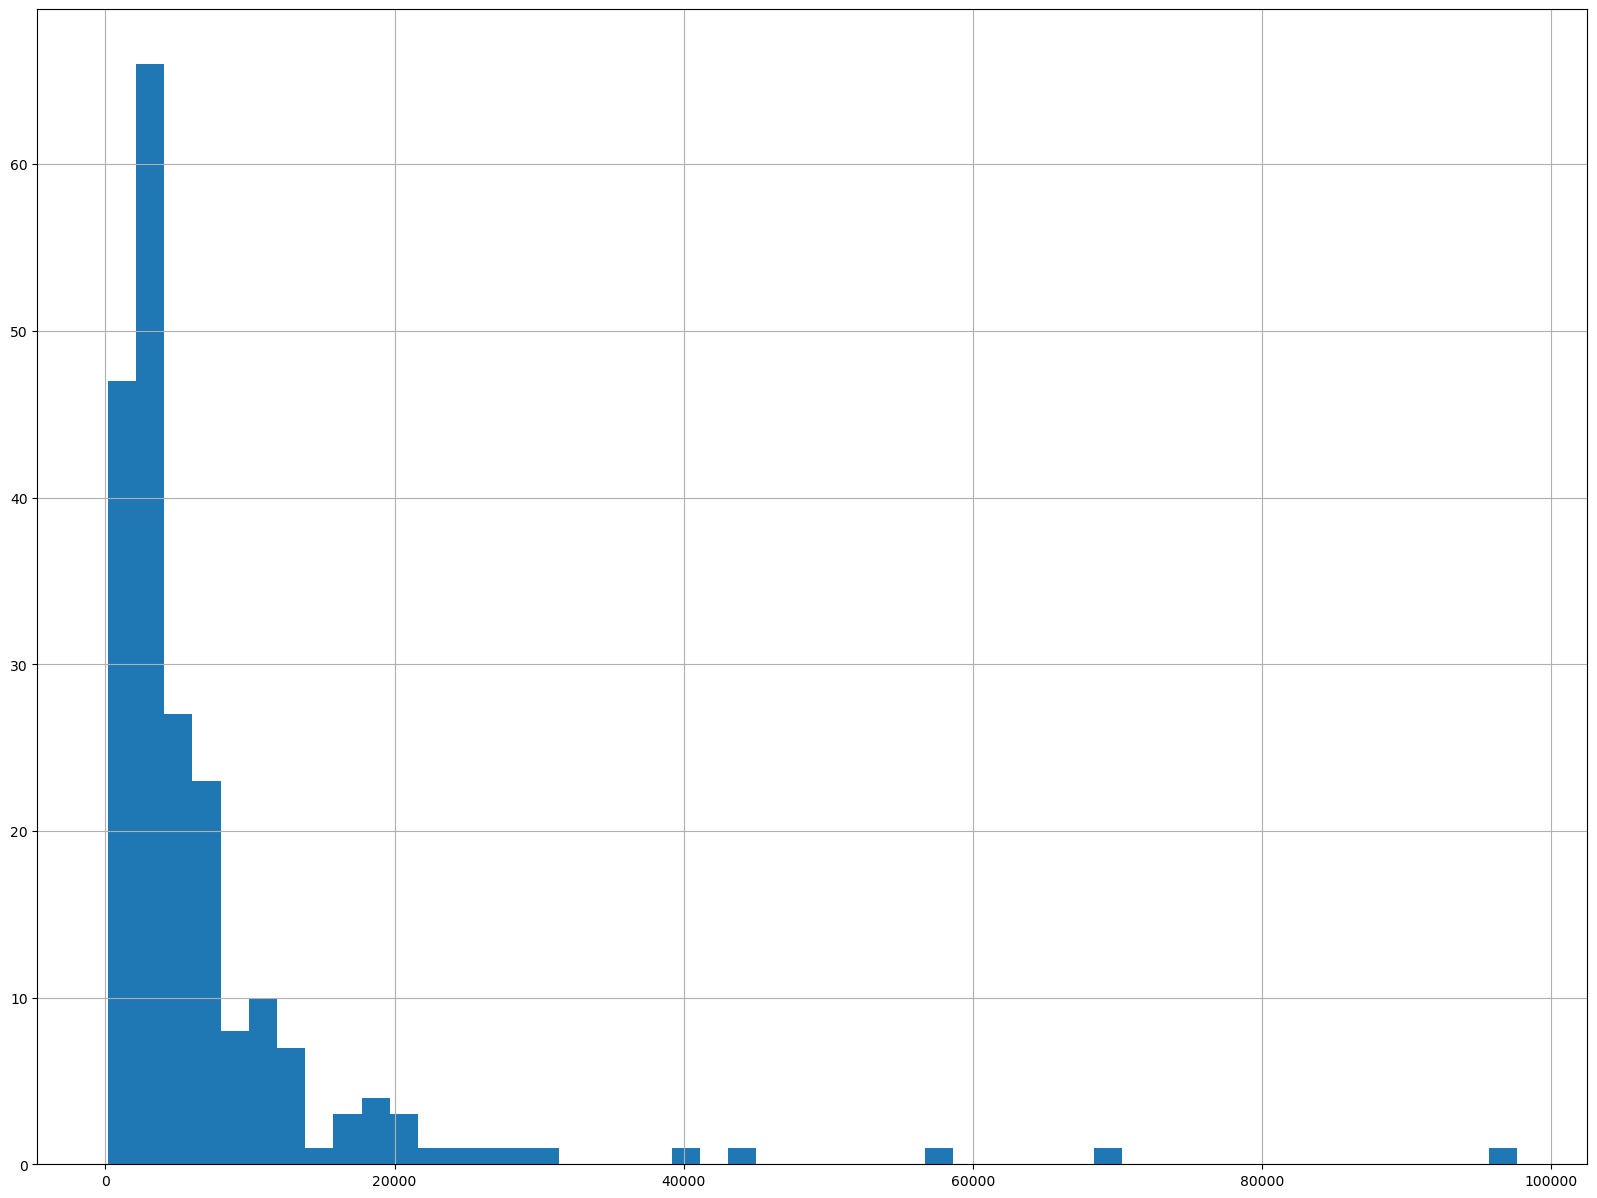

In [14]:
data['sales'].hist(bins = 50, figsize = (20,15))

## Section 02 | 이변량 데이터 검색


In [15]:
# 상관관계 : 데이터셋명.corr()
# method = 'pearson', 'spearman','kendall'
data.corr()

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/453169672.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [16]:
# pearson 상관계수
data.corr(method = 'pearson')

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/3114016724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = 'pearson')


,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [17]:
# spearman 상관계수
data.corr(method = 'spearman')

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/2117570626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = 'spearman')


,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [18]:
# kendall 상관계수
data.corr(method = 'kendall')

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/818859727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = 'kendall')


,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


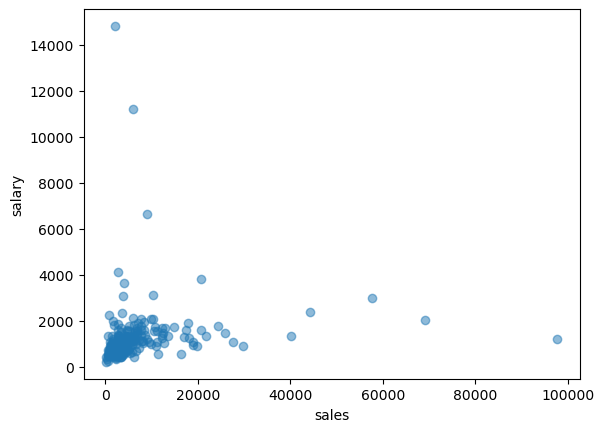

In [19]:
# 두 변수간의 산점도 plt.scatter(X, Y)
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha = 0.5)
plt.xlabel('sales')
plt.ylabel('salary')
plt.show()

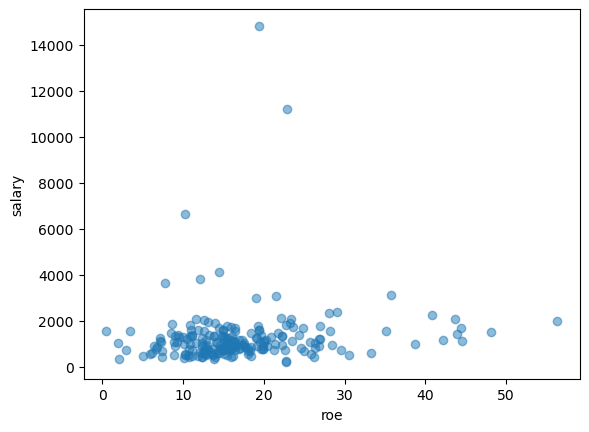

In [20]:
# roe와 salary간의 산점도
plt.scatter(data['roe'], data['salary'], alpha = 0.5)
plt.xlabel('roe')
plt.ylabel('salary')
plt.show()

In [21]:
# 산업 범주별로 평균 및 기술통계량 파악
data.groupby('industry').describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                  sales               ...                              roe  \
              max count         mean  ...          75%           max count   
industry                              ...                                    
Finance   14822.0  60.0  8080.148297  ...  7719.500000  97649.898438  60.0   
IT         6640.0  46.0  5844.047793  ...  6697.900024  24332.000000  46.0   
Others     1100.0  31.0  3382.474180  ...  4080.350098   9470.099609  31.0   
Service    3844.0  72.0  8174.736113  ...  8402.500000  69018.000000  72.0   

                                                                           
               mean        std  min     25%        50%     75%        max  
industry                                                                   
Finance   22.655000  10.199309  2.1  15.675  21.400000  26.925  48.099998  
IT        14.328261   5.864153  0.5  10.950  14.750000  16.475  33.299999  
Others    11.293548   3.151289  2.9   9.550  12.300000  13.700  15.500000  
Service   16.986111   7.374400  1.9  13.100  16.150001  19.525  56.299999  

[4 rows x 24 columns]

# Section 03 이상치 처리

In [22]:
data = pd.read_csv('Ex_CEOSalary.csv')

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fb24a7f8520>, <matplotlib.lines.Line2D object at 0x7fb24a7f87f0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb24a7f8ac0>, <matplotlib.lines.Line2D object at 0x7fb24a7f8d90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb24a7f8250>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb24a7f9060>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb24a7f9330>], 'means': []})

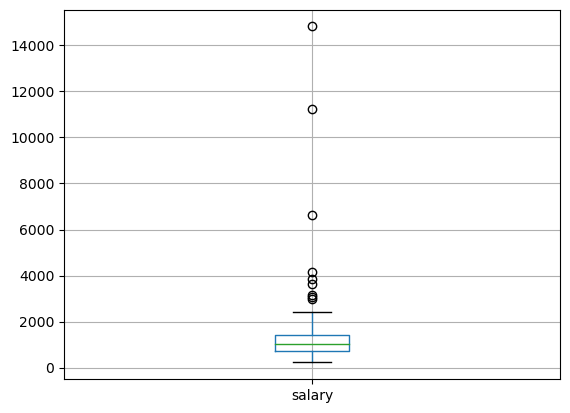

In [23]:
# 상자수염도표(box-whisker plot)
# 데이터셋.boxplot(column = '변수명', return_type = 'both') -> return_type = 'axes','dict','both'
data.boxplot(column = 'salary', return_type = 'both')

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fb24a8577f0>, <matplotlib.lines.Line2D object at 0x7fb24a857ac0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb24a857d90>, <matplotlib.lines.Line2D object at 0x7fb24a8880a0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb24a857520>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb24a888370>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb24a888640>], 'means': []})

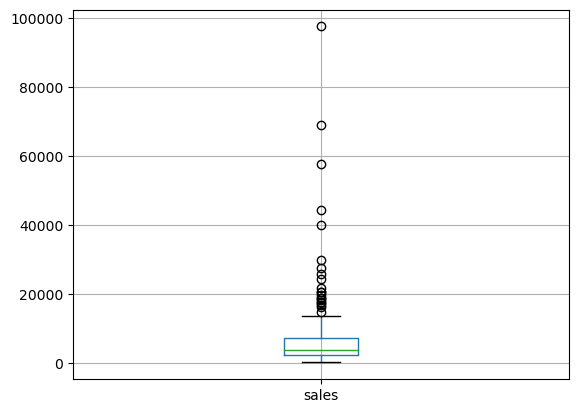

In [24]:
data.boxplot(column = 'sales', return_type = 'both')

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fb24ab1dd80>, <matplotlib.lines.Line2D object at 0x7fb24ab1e050>], 'caps': [<matplotlib.lines.Line2D object at 0x7fb24ab1e320>, <matplotlib.lines.Line2D object at 0x7fb24ab1e5f0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fb24ab1dab0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fb24ab1e860>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fb24ab1eb30>], 'means': []})

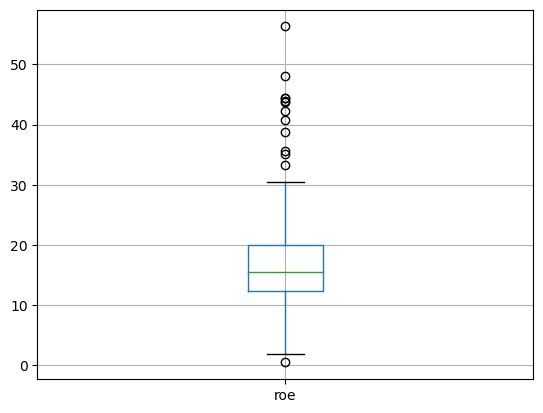

In [25]:
data.boxplot(column = 'roe', return_type='both')

## 3.1 salary 변수 이상치 처리
IQR(Inter-Quartile Range)를 기준으로 이상치를 제거  
IQR(Q3 - Q1) : 제 3사분위수 - 제 1사분위수  
IQR의 1.5배 보다 큰 값과 작은 값 제거  

In [26]:
Q1_salary = data['salary'].quantile(q = 0.25)
Q3_salary = data['salary'].quantile(q = 0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

<AxesSubplot:>

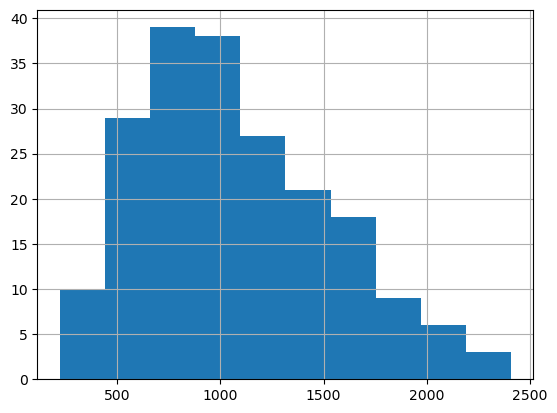

In [27]:
# IQR의 1.5배 보다 큰 값과 작은 값 제거
data_IQR = data[(data['salary'] < Q3_salary + IQR_salary*1.5)&(data['salary'] > Q1_salary - IQR_salary*1.5)]
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

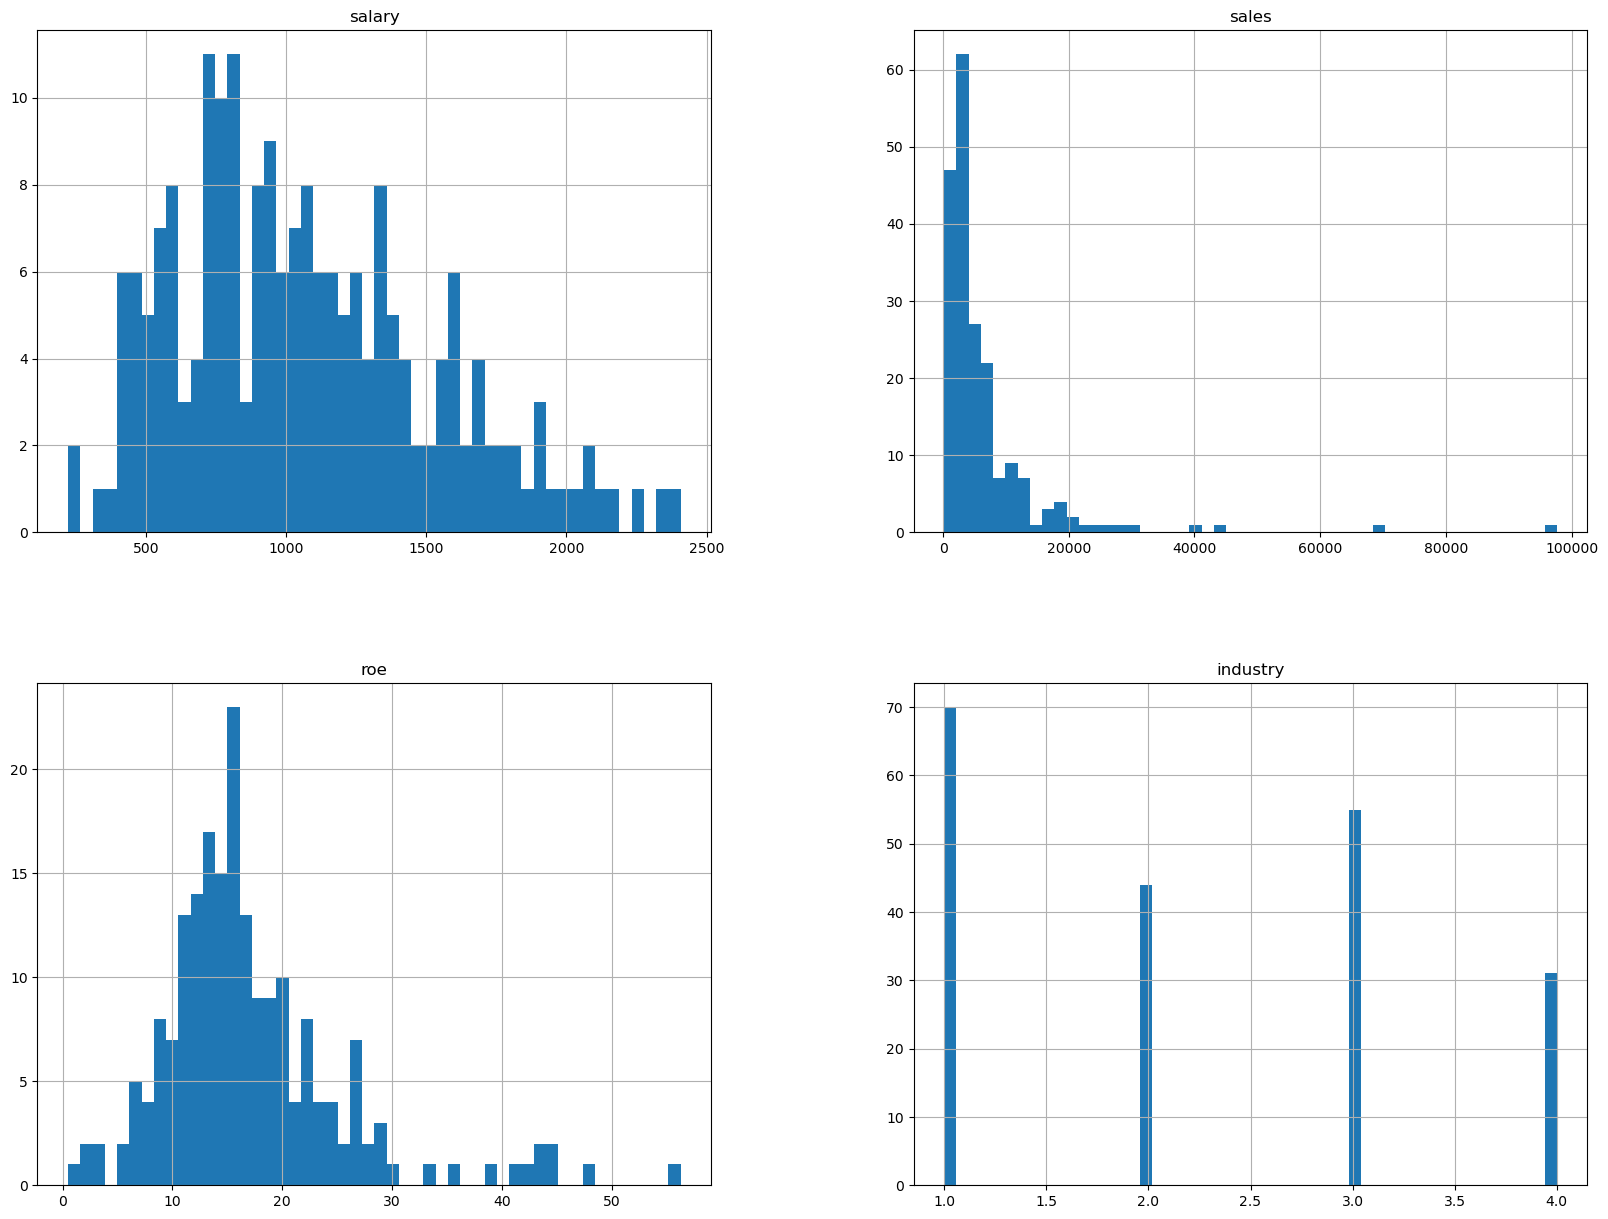

In [28]:
data_IQR.hist(bins = 50, figsize = (20, 15))

In [29]:
data_IQR

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1
...,...,...,...,...
204,930,1509.099976,9.0,4
205,525,1097.099976,15.5,4
206,658,4542.600098,12.1,4
207,555,2023.000000,13.7,4


In [30]:
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.335446,0.289704,-0.202648
sales,0.335446,1.000000,-0.065034,-0.069790
roe,0.289704,-0.065034,1.000000,-0.024423
industry,-0.202648,-0.069790,-0.024423,1.000000


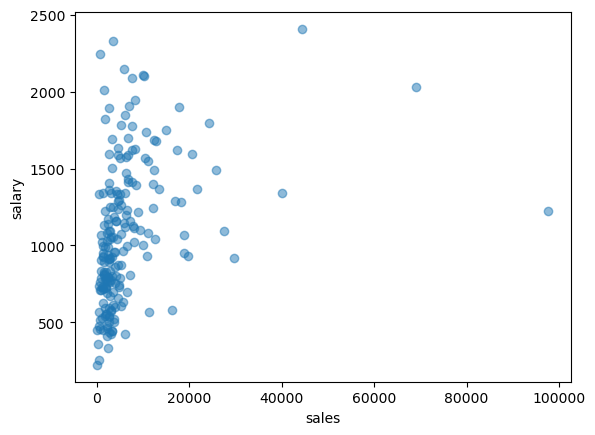

In [31]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'],data_IQR['salary'], alpha = 0.5)
plt.xlabel('sales')
plt.ylabel('salary')
plt.show()

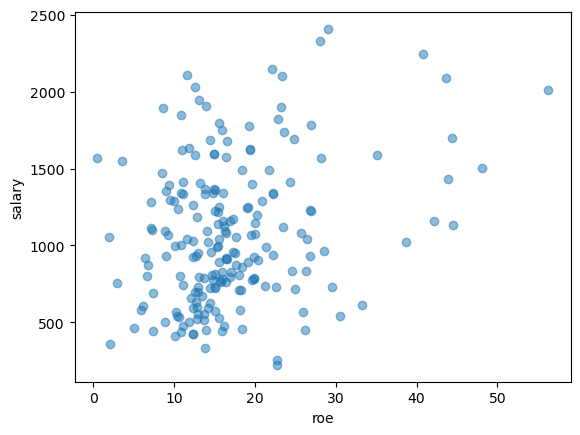

In [32]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha = 0.5)
plt.xlabel('roe')
plt.ylabel('salary')
plt.show()

## 3.2 sales 변수 이상치 처리

In [33]:
Q1_sales = data['sales'].quantile(q = 0.25)
Q3_sales = data['sales'].quantile(q = 0.75)
IQR_sales = Q3_sales-Q1_sales
IQR_sales

4966.6999511718695

<AxesSubplot:>

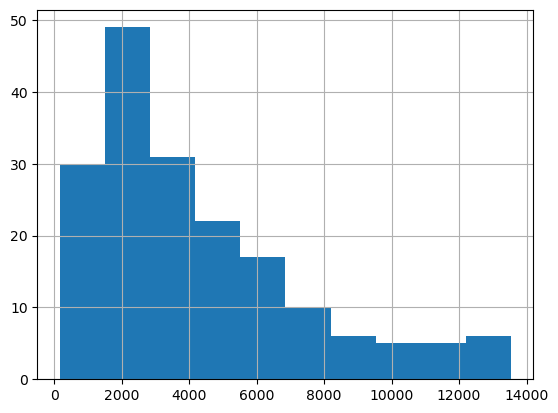

In [34]:
# IQR을 이용하여 이상치 처리한 데이터
data_IQR = data[(data['sales']<Q3_sales + IQR_sales * 1.5) & (data['sales'] > Q1_sales - IQR_sales * 1.5) & \
               (data['salary'] < Q3_salary + IQR_salary * 1.5) & (data['salary']>Q1_salary - IQR_salary * 1.5)]
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

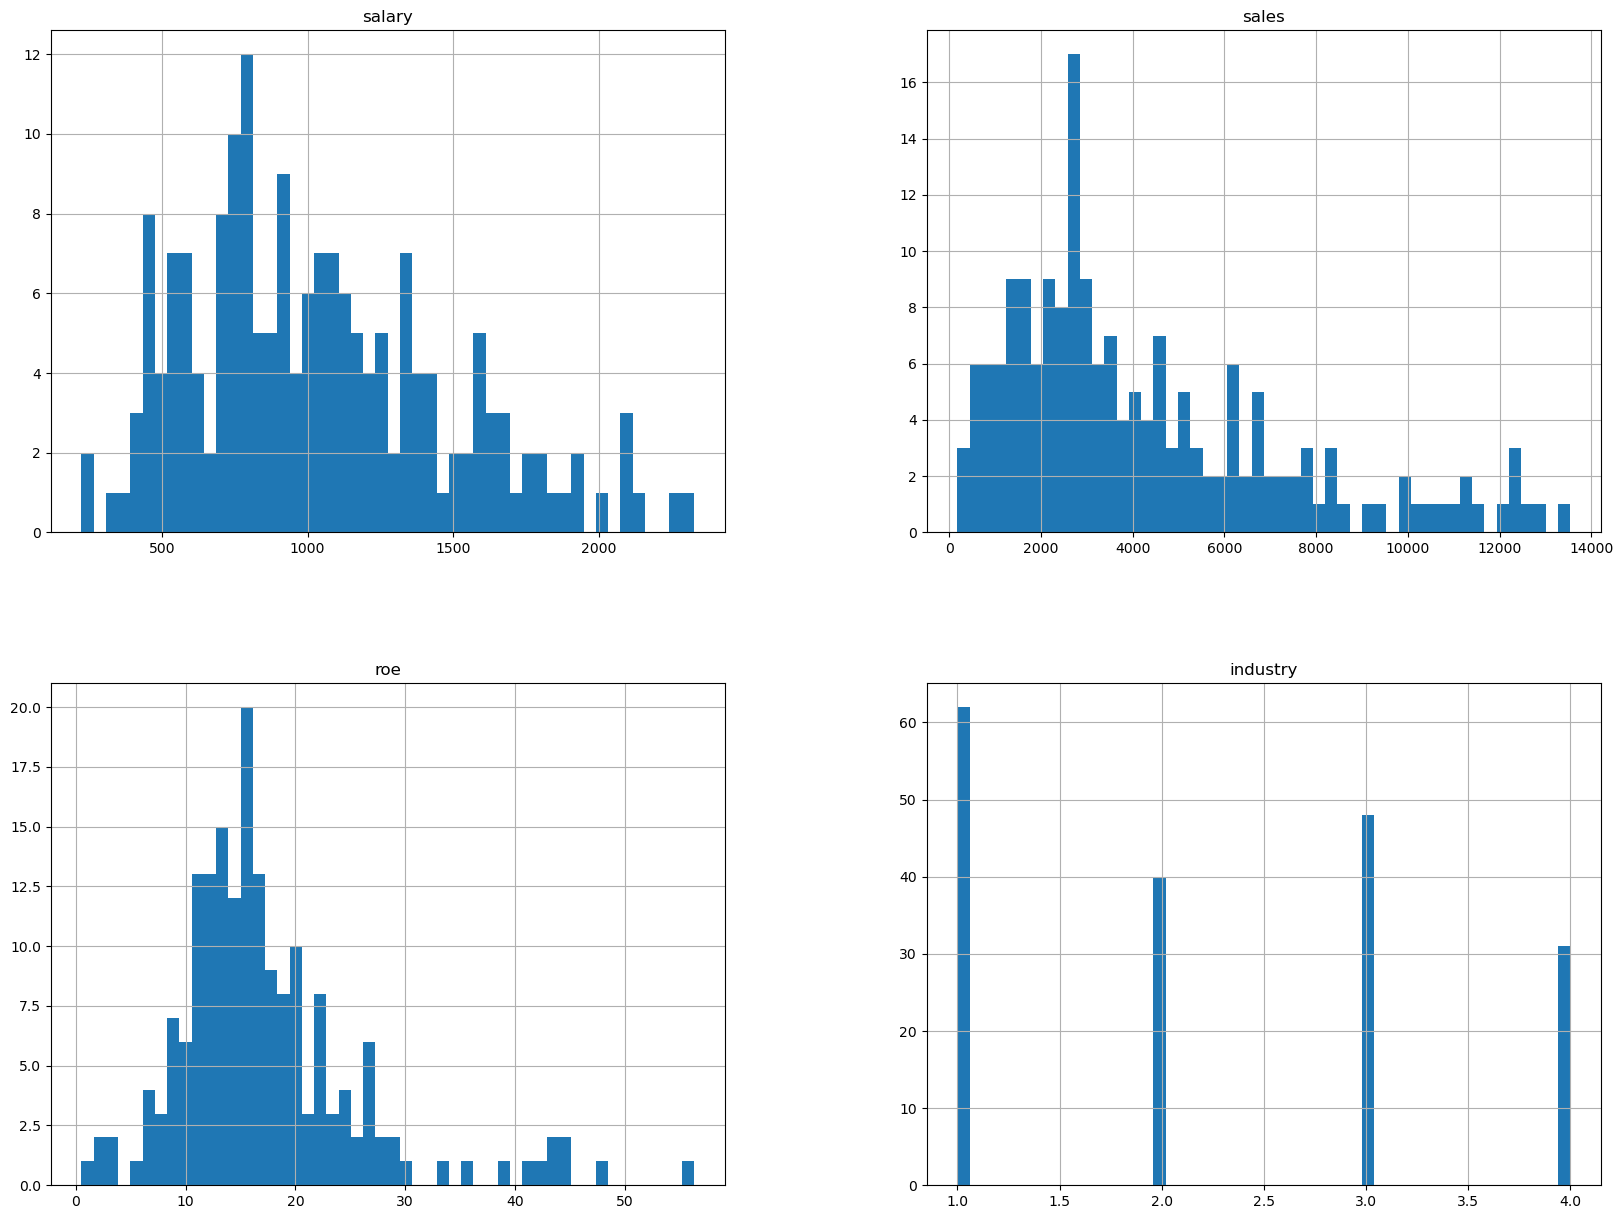

In [35]:
data_IQR.hist(bins = 50, figsize = (20, 15))

In [36]:
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.471278,0.299153,-0.223324
sales,0.471278,1.000000,-0.076046,-0.106834
roe,0.299153,-0.076046,1.000000,-0.050202
industry,-0.223324,-0.106834,-0.050202,1.000000


# Section 04 변수 변환
I. Log 변환 -> 데이터의 단위를 줄여 이상치를 처리한다.

In [37]:
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,1,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,1,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,1,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,1,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,1,7.221105,9.988894,2.624669


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'industry'}>,
        <AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>],
       [<AxesSubplot:title={'center':'log_roe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

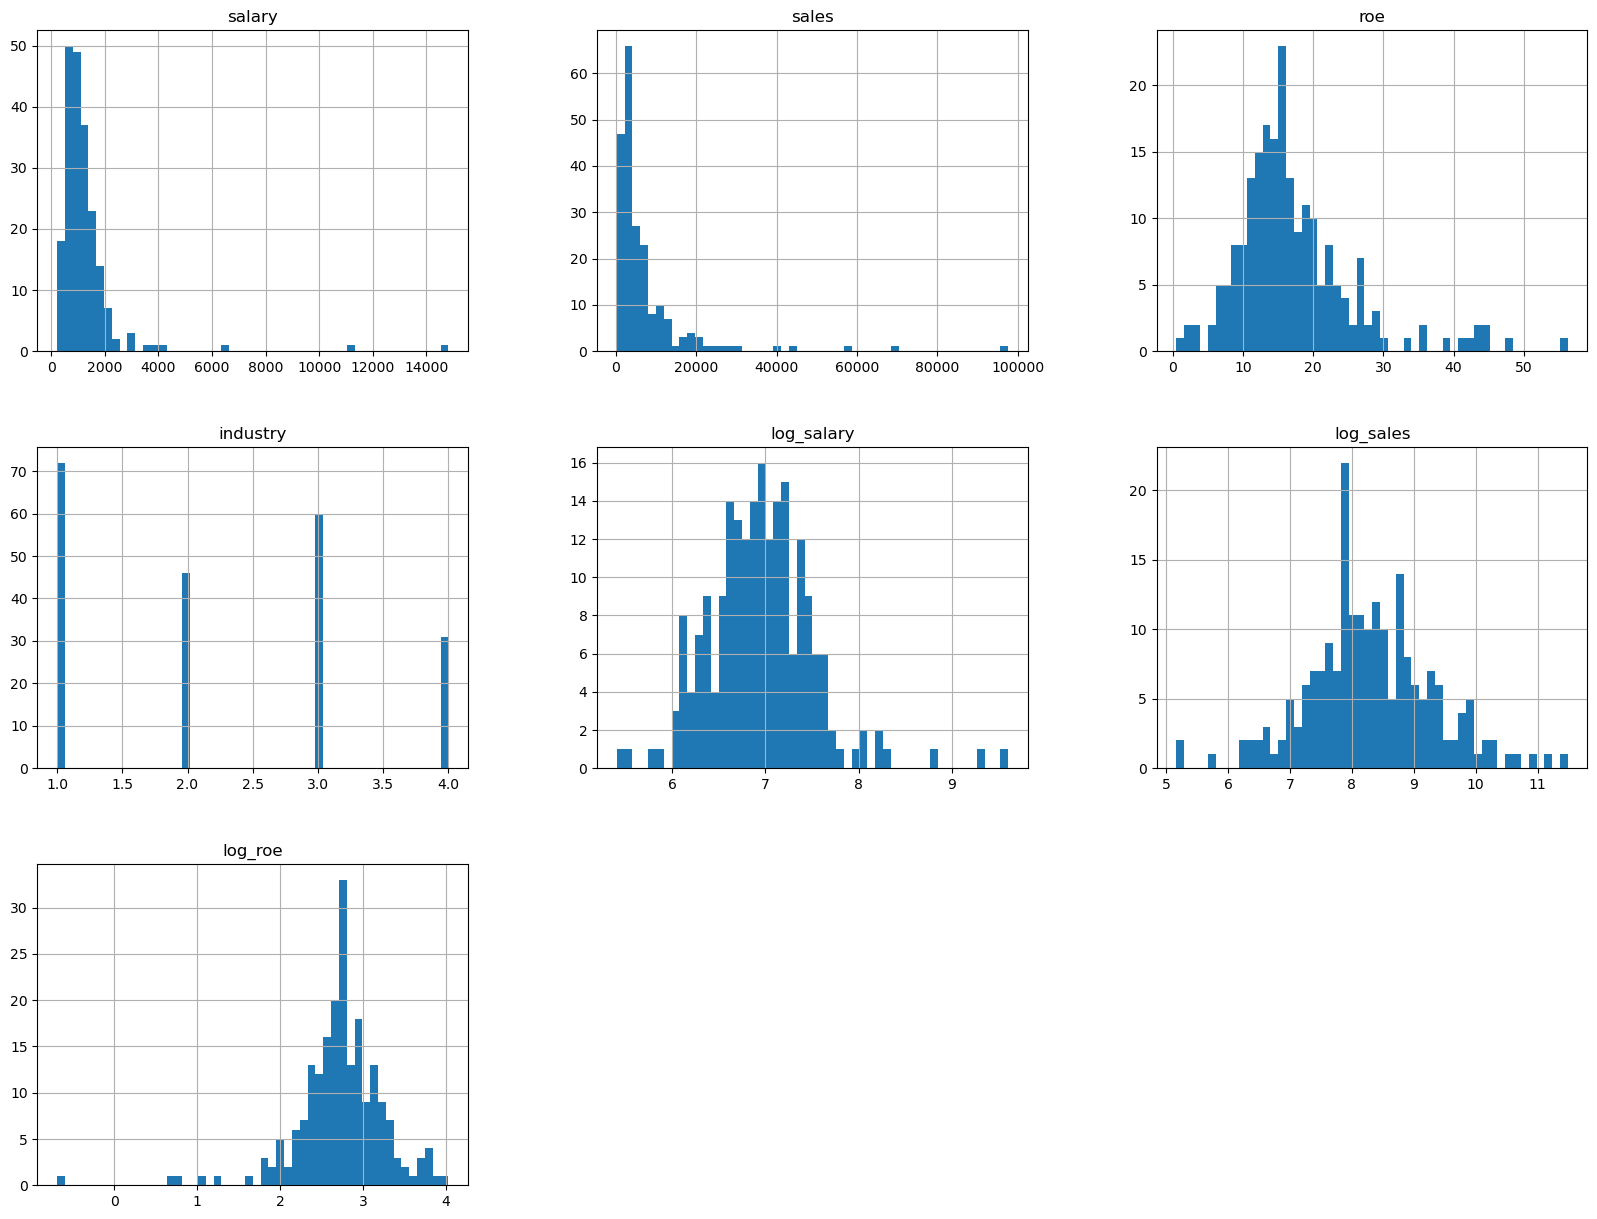

In [38]:
data.hist(bins = 50, figsize = (20,15))

In [39]:
data.corr()

,salary,sales,roe,industry,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000


## 4.2 제곱근 변환
np.sqrt(데이터셋명['변수명'])

In [40]:
data['sqrt_salary'] = np.sqrt(data['salary'])
data['sqrt_sales'] = np.sqrt(data['sales'])
data['sqrt_roe'] = np.sqrt(data['roe'])
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,1,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,1,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,1,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,1,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,1,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'industry'}>,
        <AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>],
       [<AxesSubplot:title={'center':'log_roe'}>,
        <AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>],
       [<AxesSubplot:title={'center':'sqrt_roe'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

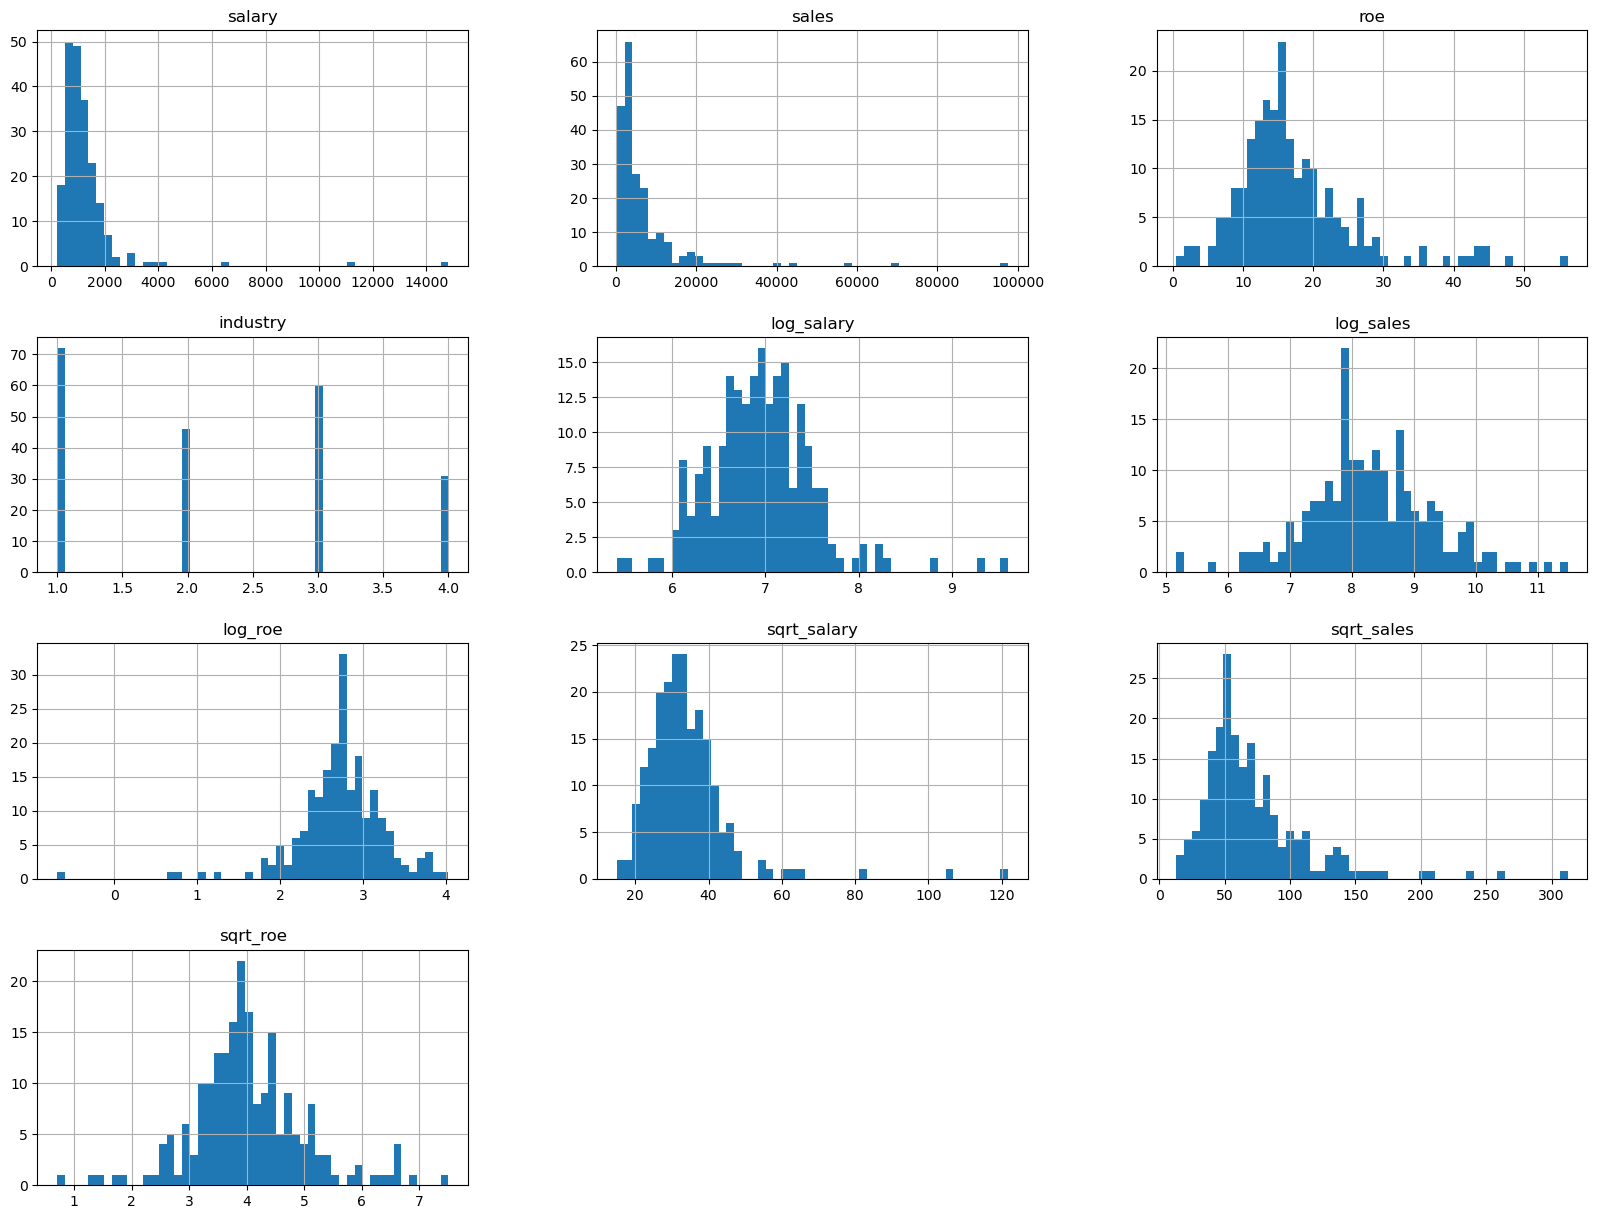

In [41]:
data.hist(bins = 50, figsize = (20, 15))

In [42]:
data.corr()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
salary,1.000000,0.119869,0.114842,-0.015725,0.794208,0.194092,0.101526,0.945732,0.164340,0.115219
sales,0.119869,1.000000,-0.055386,-0.100284,0.281286,0.742921,-0.041004,0.215716,0.936282,-0.050538
roe,0.114842,-0.055386,1.000000,-0.011833,0.208499,-0.122553,0.873419,0.172327,-0.087687,0.977012
industry,-0.015725,-0.100284,-0.011833,1.000000,-0.173583,-0.118576,-0.051647,-0.094616,-0.125441,-0.036050
log_salary,0.794208,0.281286,0.208499,-0.173583,1.000000,0.459148,0.163548,0.946014,0.386456,0.197914
log_sales,0.194092,0.742921,-0.122553,-0.118576,0.459148,1.000000,-0.120642,0.342422,0.920797,-0.129020
log_roe,0.101526,-0.041004,0.873419,-0.051647,0.163548,-0.120642,1.000000,0.139470,-0.083308,0.953806
sqrt_salary,0.945732,0.215716,0.172327,-0.094616,0.946014,0.342422,0.139470,1.000000,0.293173,0.165932
sqrt_sales,0.164340,0.936282,-0.087687,-0.125441,0.386456,0.920797,-0.083308,0.293173,1.000000,-0.089501
sqrt_roe,0.115219,-0.050538,0.977012,-0.036050,0.197914,-0.129020,0.953806,0.165932,-0.089501,1.000000


-> 이상치를 제거하지 않고 변수변환을 하면 이상치의 영향을 크게 줄일 수 있음

# Section 05 결측치 처리

In [43]:
import pandas as pd
data = pd.read_csv('EX_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


## 5.1 결측치 확인

In [44]:
# isnull() : 결측이면 True, 결측이 아니면 False 값 반환함
pd.isnull(data)
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [45]:
# notnull() : 결측이면 False, 결측이 아니면 True 값 반환
pd.notnull(data)
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


In [46]:
# 변수(컬럼)별로 결측값 개수 확인하기 위해서는 df.isnull().sum() 함수 이용
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [47]:
# 특정 변수(컬럼)의 결측값 개수 확인 : df.isnull().sum()
data['salary'].isnull().sum()

2

In [48]:
# 변수(컬럼)별로 결측 아닌 값의 개수 확인 : df.notnull().sum()
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [49]:
data['salary'].notnull().sum()

8

In [50]:
## 나. 행별 결측 확인 및 저장
# 행(row) 단위로 결측값 개수 구하기 : df.isnull().sum(1)
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [51]:
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [52]:
# 행(row) 단위로 결측값 개수 구해서 새변수 생성하기
data['missing'] = data.isnull().sum(1)
data

,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [53]:
# 행(row) 단위로 실측값 개수 구하기 : df.notnull().sum(1)
del data['missing']
data['valid'] = data.notnull().sum(1)
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


## 5.2 결측값 : dropna()
- 결측값이 있는 행 제거 : delete row with missing values  
- 결측값이 있는 열 제거 : delete columns with missing values  
- 결측값이 있는 특정 행 또는 열 제거 : delete specific row or column with missing values

In [54]:
# 가. 결측값 있는 행(row/case) 제거
data_del_row = data.dropna(axis = 0)
data_del_row

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
3,578.0,16246.000000,5.900000,1,4
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4


In [55]:
# 나. 결측값 있는 열(column/variable) 제거
data_del_columns = data.dropna(axis = 1)
data_del_columns

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


In [56]:
# 다. 결측값 있는 특정 행/열 제거
# 데이터셋[['변수명']].dropna()
data[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [57]:
# 4가지 변수 중에 결측치가 하나라도 있는 케이스 제거
data[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [58]:
# dropna() default => axis = 0
data[['salary','sales','roe','industry']].dropna(axis = 0)

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [59]:
# 열(변수*컬럼)을 기준으로 결측치가 있는 것을 모두 제거
data[['salary','sales','roe','industry']].dropna(axis = 1)

,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


## 5.3 결측값 대체
- fillna()
- 결측값을 특정 값으로 대체 : replace missing values with scalar value
- 결측값을 변수별 평균으로 대체 : filling missing values with mean value per columns
- 결측값을 다른 변수의 값으로 대체 : filling missing values with another columns values
- 결측값을 그룹 평균값으로 대체 : filling missing values by Group means

In [60]:
import pandas as pd
data = pd.read_csv('Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [61]:
# 가. 특정값으로 대체 : df.fillna(value/string)
data_0 = data.fillna(0)
data_0

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,0.0,9958.000000,10.900000,1
2,0.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,0.000000,13.800000,1
5,1145.0,0.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,0.000000,2


In [62]:
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [63]:
# 결측값을 채우는 방법
# fillna(method = 'ffill' or 'pad') : 앞의 값으로 대체
data_ffill = data.fillna(method = 'ffill')
data_ffill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [64]:
data_pad = data.fillna(method = 'pad')
data_pad

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [65]:
# 결측값을 채우는 방법
# df.fillna(method = 'bfill' or 'backfill') : 뒷 방향으로 채우는 방법
data_bfill = data.fillna(method = 'bfill')
data_bfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [66]:
data_backfill = data.fillna(method = 'backfill')
data_backfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


### 나. 평균 대체
- df.fillna(df.mean())
- df.where(pd.notnull(df), df.mean(), axis = 'columns')

In [67]:
# 평균으로 대체
data_mean = data.fillna(data.mean())
data_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,9069.825012,13.800000,1
5,1145.0,9069.825012,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.600000,2


In [68]:
# 중위수로 대체
data_median = data.fillna(data.median())
data_median

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [69]:
data_max = data.fillna(data.max())
data_max

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1368.0,9958.000000,10.900000,1
2,1368.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,27595.000000,13.800000,1
5,1145.0,27595.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,23.500000,2


In [70]:
data_min = data.fillna(data.min())
data_min

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,5.900000,2


In [71]:
# 다. 다른 변수 값으로 대체
import numpy as np
data2 = data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True, data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,sales_new
0,1095.0,27595.000000,14.100000,1,27595.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,16246.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,2266.699951
7,1094.0,2966.800049,16.299999,2,2966.800049
8,1237.0,4570.200195,10.500000,2,4570.200195
9,833.0,2830.000000,NaN,2,2830.000000


In [72]:
# 라. 집단 평균값으로 대체 
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224976,13.64
2,1077.400000,3158.425049,15.80


In [73]:
fill_mean_func = lambda g: g.fillna(g.mean())

In [74]:
data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/2111823424.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_group_mean = data.groupby('industry').apply(fill_mean_func)


,salary,sales,roe,industry
0,1095.000000,27595.000000,14.100000,1
1,1013.666667,9958.000000,10.900000,1
2,1013.666667,6125.899902,23.500000,1
3,578.000000,16246.000000,5.900000,1
4,1368.000000,14981.224975,13.800000,1
5,1145.000000,3158.425049,20.000000,2
6,1078.000000,2266.699951,16.400000,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.500000,2
9,833.000000,2830.000000,15.800000,2


In [75]:
fill_values = {1: 1000, 2: 2000}

In [76]:
fill_func = lambda d: d.fillna(fill_values[d.name])

In [77]:
data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

/var/folders/hf/9cldw65x7j71qr4hjbw44yjc0000gn/T/ipykernel_6921/1613126455.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_group_value = data.groupby('industry').apply(fill_func)


,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1000.0,9958.000000,10.900000,1
2,1000.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1000.000000,13.800000,1
5,1145.0,2000.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,2000.000000,2


In [78]:
# interpolate : 보간법
missing_fill_val = {'salary' : data.salary.interpolate(),
                   'sales' : data.sales.mean(),
                   'roe' : 'missing'}
print(missing_fill_val)

{'salary': 0    1095.000000
1     922.666667
2     750.333333
3     578.000000
4    1368.000000
5    1145.000000
6    1078.000000
7    1094.000000
8    1237.000000
9     833.000000
Name: salary, dtype: float64, 'sales': 9069.825012125, 'roe': 'missing'}


In [79]:
data_multi = data.fillna(missing_fill_val)
data_multi

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2


# Section 06 데이터정제 실전과제

### 6.1 데이터 불러오기 및 탐색

In [80]:
import pandas as pd
data = pd.read_csv('house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [81]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

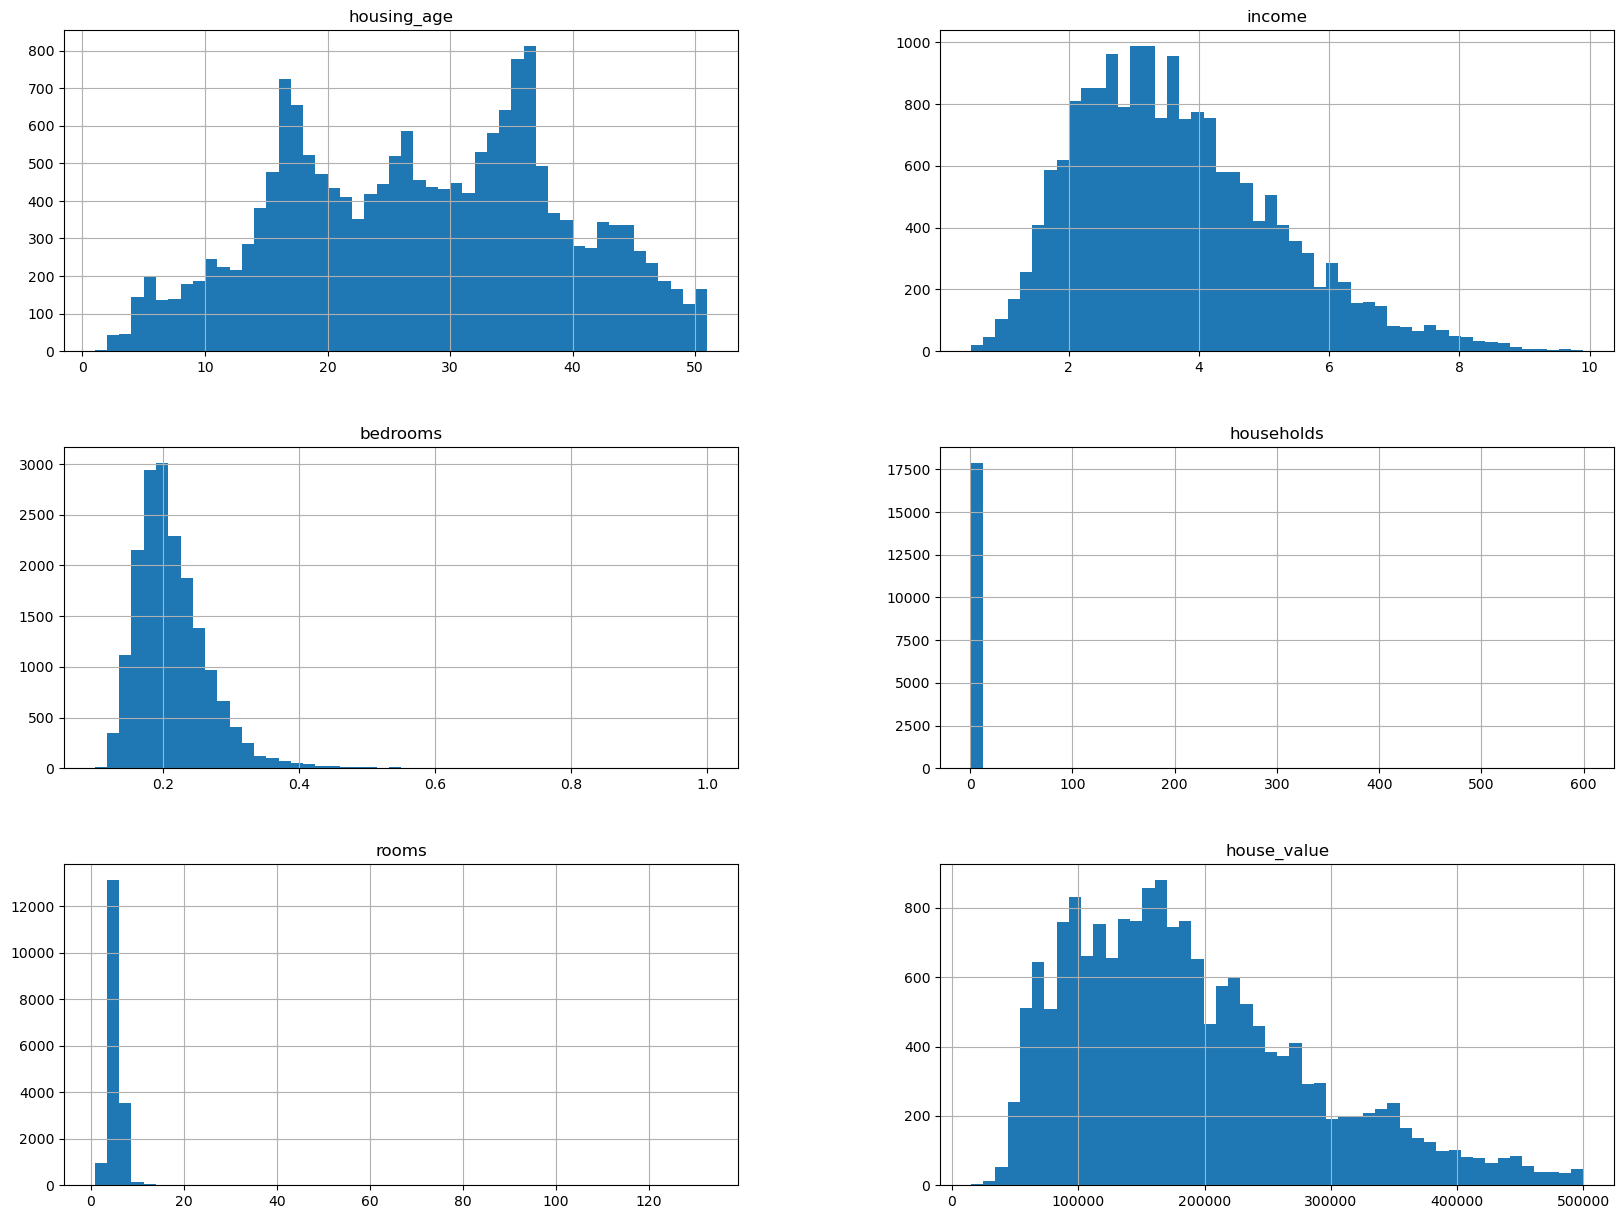

In [82]:
data.hist(bins = 50, figsize = (20,15))

### 6.2 선형회귀 적용 (정제 전 데이터)

In [83]:
X = data[data.columns[0:5]]
y = data[['house_value']]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [87]:
pred_train = model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5463729131516732

In [88]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

-2.8220648010161558

## 6.3 데이터 정제를 위한 세부 검토

<AxesSubplot:>

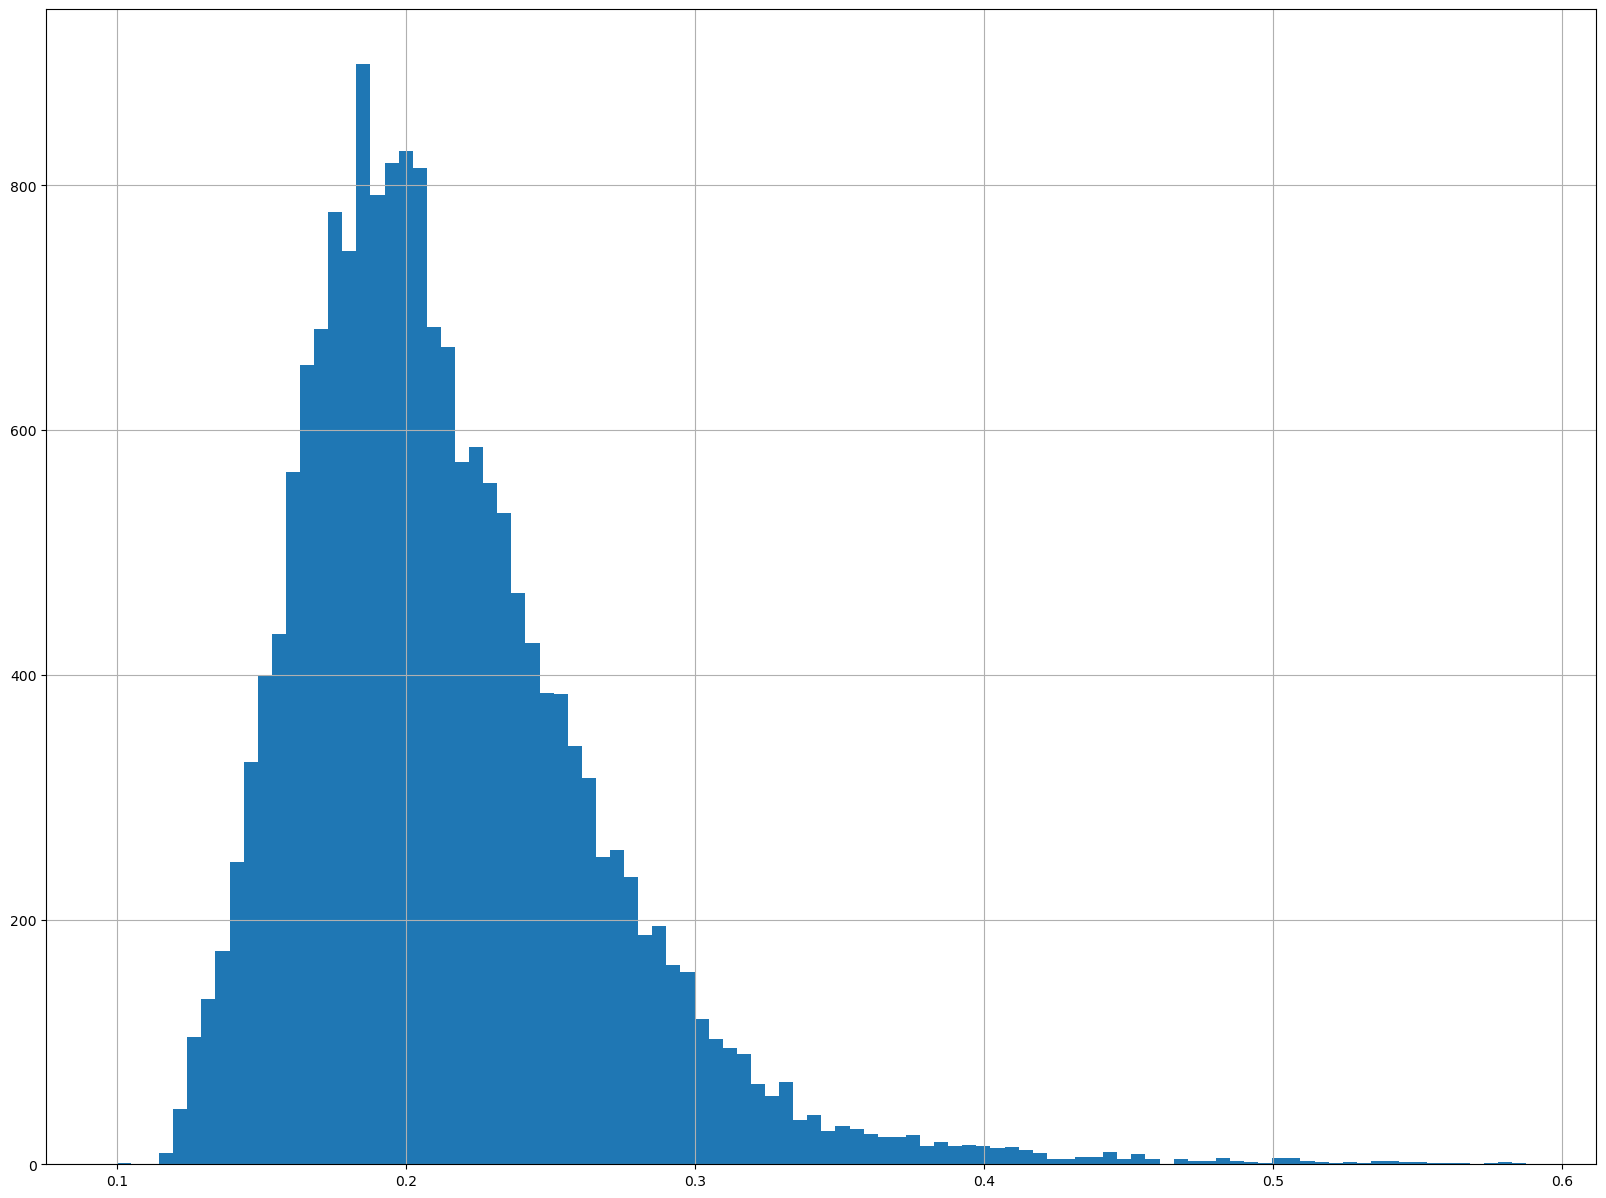

In [89]:
data_bedroom = data[data['bedrooms']<0.6]
data_bedroom['bedrooms'].hist(bins = 100, figsize = (20,15))

In [90]:
data_bedroom2 = data[data['bedrooms']>=0.6]
print(data_bedroom2['bedrooms'].value_counts())
data_bedroom2

1.000000    3
0.602489    1
0.635258    1
0.658869    1
0.613084    1
0.662539    1
0.625887    1
0.923077    1
0.700000    1
0.627338    1
0.686114    1
0.750000    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


<AxesSubplot:>

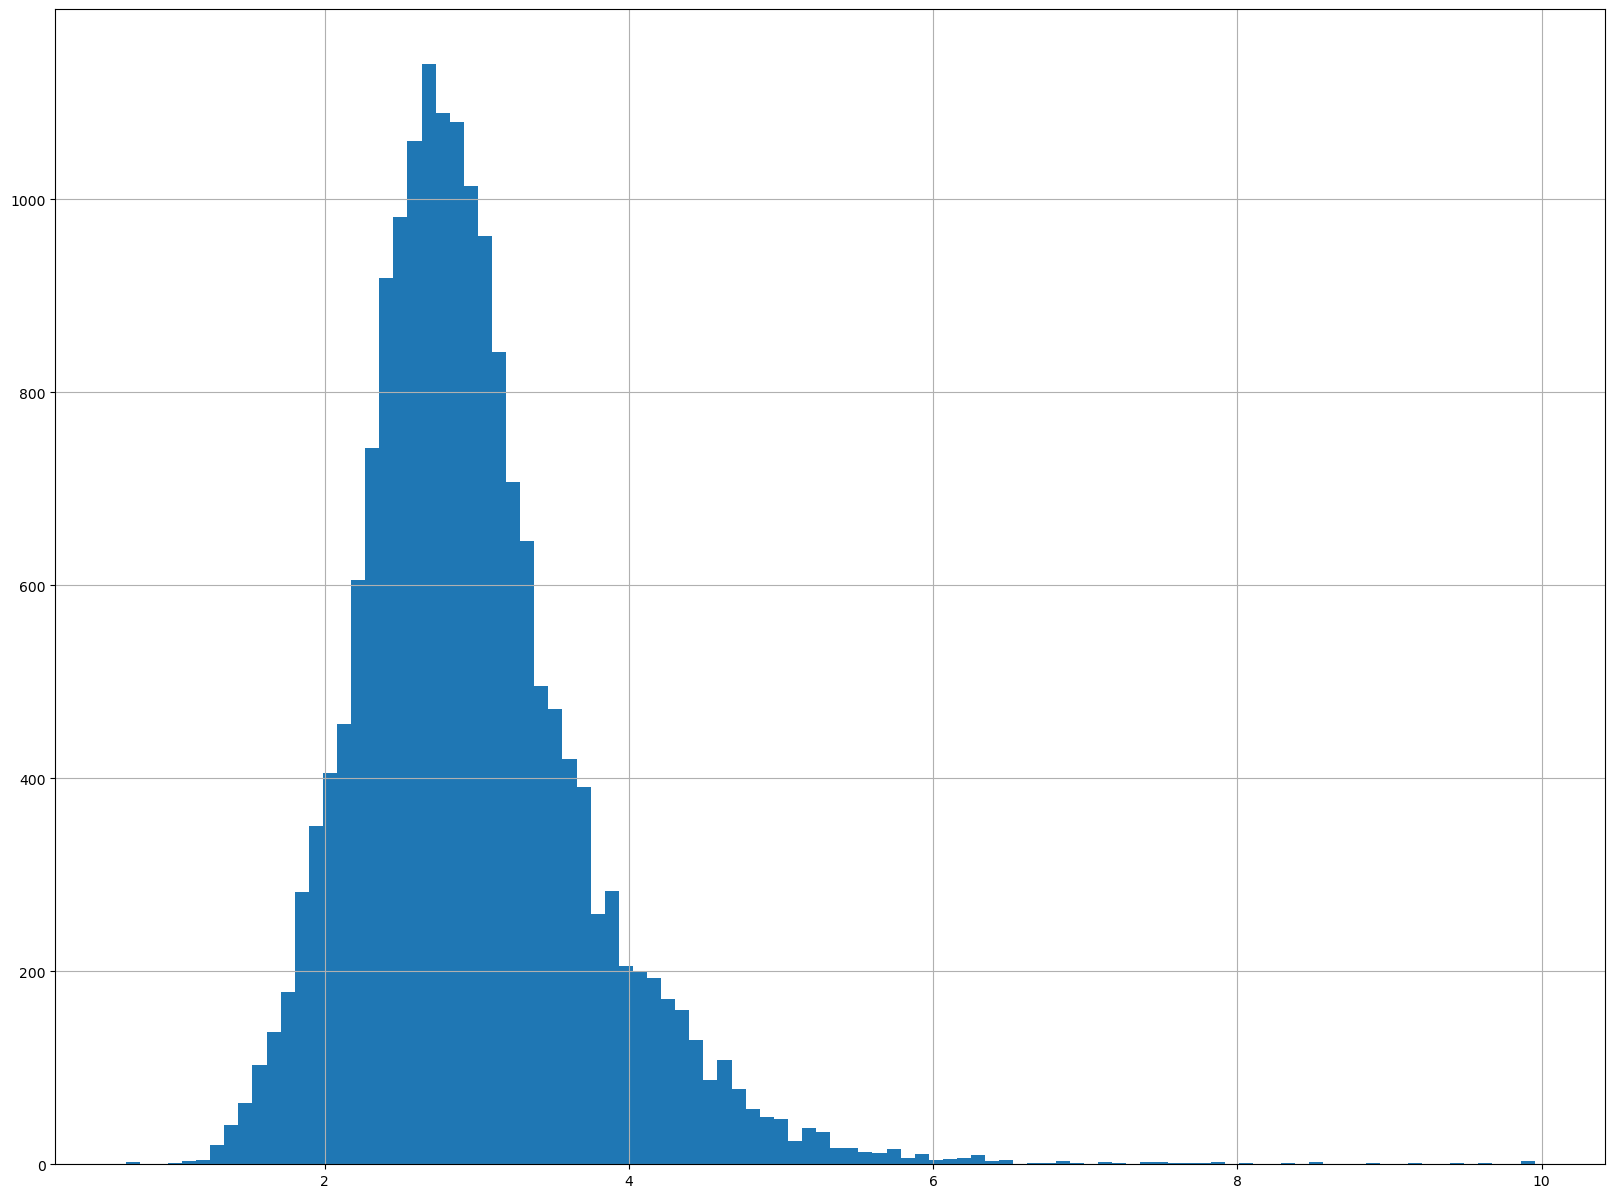

In [91]:
data_hoseholds = data[data['households']<10]
data_hoseholds['households'].hist(bins =100, figsize = (20,15))

In [92]:
data_households2 = data[data['households']>=10]
print(data_households2['households'].value_counts())
data_households2

13.693487     1
12.234043     1
11.634146     1
19.312500     1
12.098940     1
12.296089     1
10.153846     1
10.980000     1
599.714286    1
12.895397     1
15.812155     1
12.130081     1
13.594828     1
18.500000     1
12.843750     1
18.444444     1
16.048780     1
63.750000     1
14.000000     1
51.400000     1
33.952941     1
16.937500     1
Name: households, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


<AxesSubplot:>

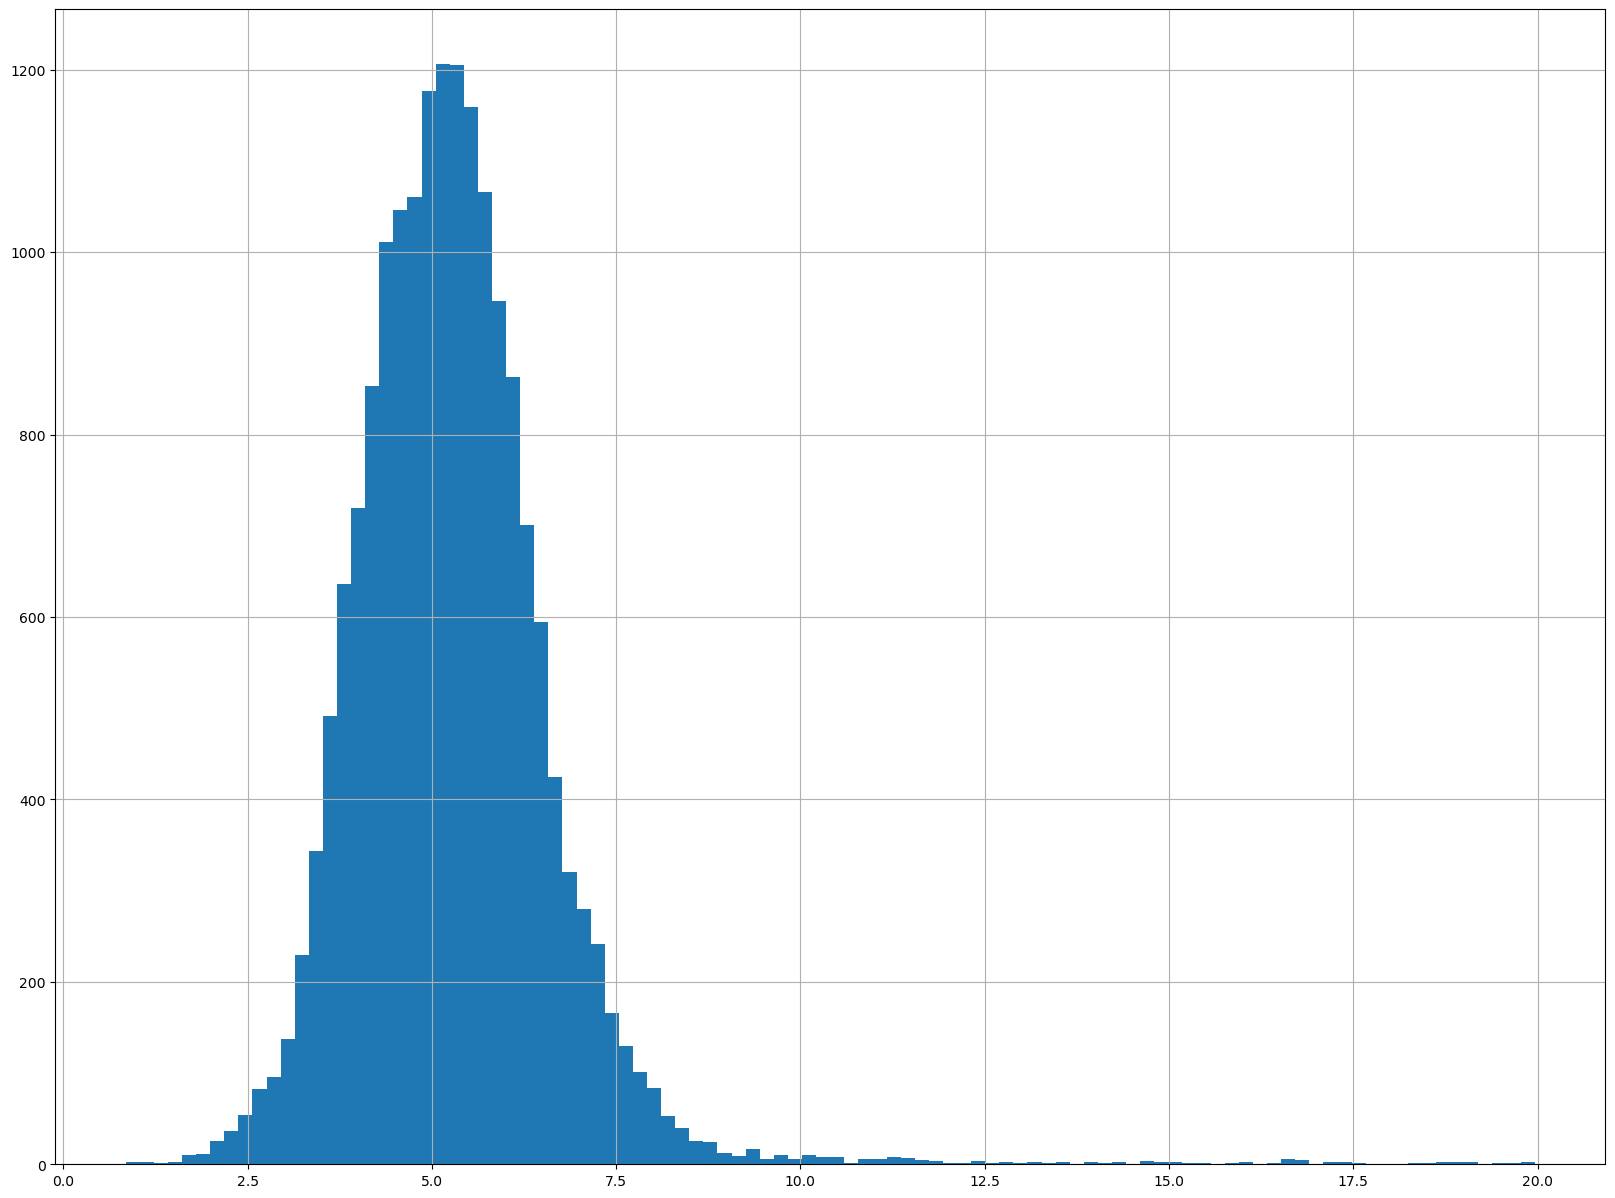

In [93]:
data_room = data[data['rooms']<20]
data_room['rooms'].hist(bins = 100, figsize = (20,15))

In [94]:
data_room2 = data[data['rooms']>=20]
print(data_room2['rooms'].value_counts())
data_room2

24.500000     2
61.812500     1
20.033333     1
36.060606     1
26.041096     1
             ..
26.511416     1
132.533333    1
24.900000     1
26.465969     1
31.777778     1
Name: rooms, Length: 63, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


In [95]:
new_data = data[(data['bedrooms']<0.5) & (data['households']<7)&(data['rooms']<12)]

In [96]:
# describe() : 기술통계확인
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

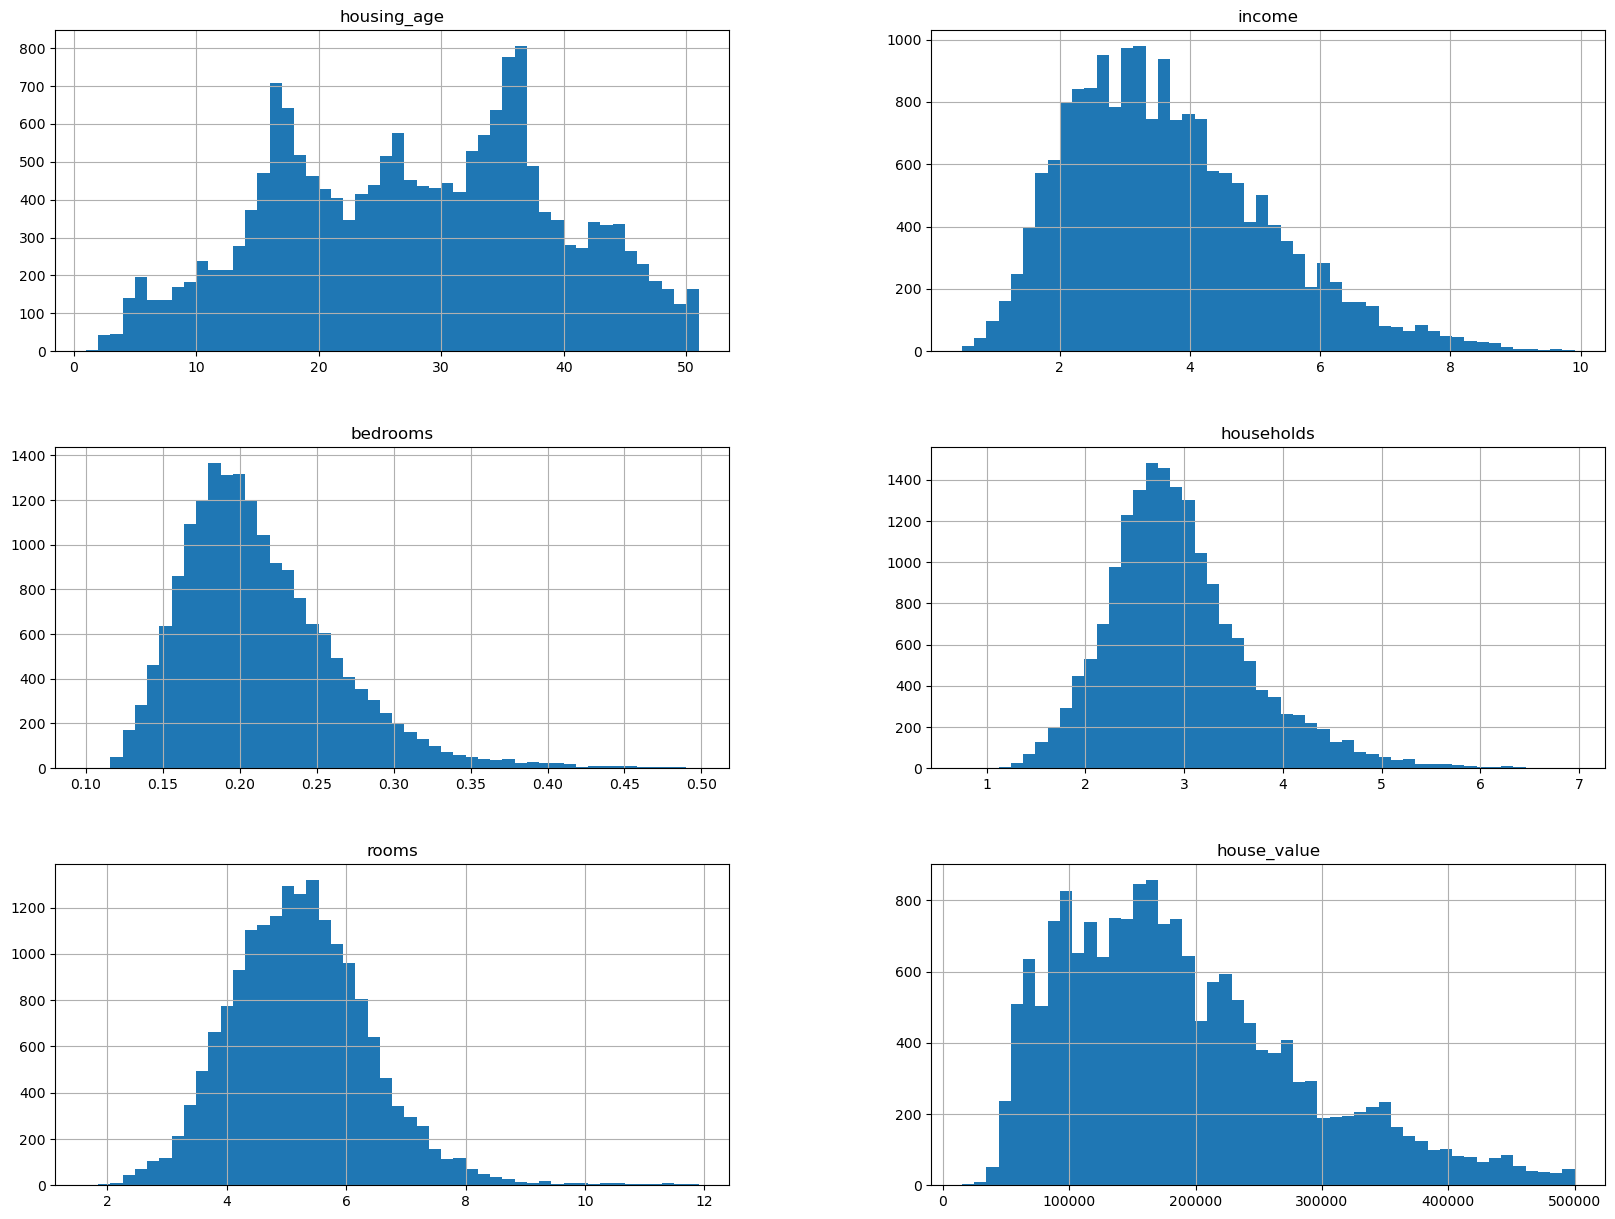

In [97]:
new_data.hist(bins = 50, figsize = (20,15))

### 6.5 선형회귀 적용 (정제 후 데이터)

In [98]:
# 특성 데이터셋, 레이블 데이터셋 나누기
X = new_data[new_data.columns[0:5]]
y = new_data[['house_value']]

# Trian , Test 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# 데이터 정규화 (min-max)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

# 훈련 데이터 및 테스트 데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# 선형 모델 적용
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

# 훈련데이터의 정확도(R-square : 설명력) 확인
pred_train = model.predict(X_scaled_minmax_train)
print('훈련데이터 정확도', model.score(X_scaled_minmax_train,y_train))

# 테스트데이터의 정확도(R-square : 설명력)확인
pred_test = model.predict(X_scaled_minmax_test)
print('훈련데이터 정확도', model.score(X_scaled_minmax_test,y_test))

훈련데이터 정확도 0.5706921210926263
훈련데이터 정확도 0.5826083517811866


In [99]:
# 데이터 내보내기
# new_data.to_csv('housing_price.csv', index = False)